# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


In [2]:
PATH_TRAIN = "/datasets/gold_recovery_train.csv"
PATH_TEST  = "/datasets/gold_recovery_test.csv"
PATH_FULL  = "/datasets/gold_recovery_full.csv"

train = pd.read_csv(PATH_TRAIN, parse_dates=["date"], index_col="date")
test  = pd.read_csv(PATH_TEST,  parse_dates=["date"], index_col="date")
full  = pd.read_csv(PATH_FULL,  parse_dates=["date"], index_col="date")

train.shape, test.shape, full.shape

((16860, 86), (5856, 52), (22716, 86))

In [3]:
display(train.head())
train.isna().mean().sort_values(ascending=False).head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


rougher.output.recovery               0.152610
rougher.output.tail_ag                0.133452
rougher.output.tail_sol               0.133393
rougher.output.tail_au                0.133393
secondary_cleaner.output.tail_sol     0.117794
rougher.input.floatbank11_xanthate    0.112930
final.output.recovery                 0.090214
primary_cleaner.input.sulfate         0.077521
primary_cleaner.input.depressant      0.074852
rougher.calculation.au_pb_ratio       0.073665
dtype: float64

In [9]:
import pandas as pd

PATH_TRAIN = "/datasets/gold_recovery_train.csv"
PATH_TEST  = "/datasets/gold_recovery_test.csv"
PATH_FULL  = "/datasets/gold_recovery_full.csv"

train = pd.read_csv(PATH_TRAIN, parse_dates=["date"], index_col="date")
test  = pd.read_csv(PATH_TEST,  parse_dates=["date"], index_col="date")
full  = pd.read_csv(PATH_FULL,  parse_dates=["date"], index_col="date")

def calc_recovery(F, C, T):
    num = C*(F - T)
    den = F*(C - T)
    return num/den

mask = train[['rougher.input.feed_au',
              'rougher.output.concentrate_au',
              'rougher.output.tail_au',
              'rougher.output.recovery']].dropna().index

calc = calc_recovery(train.loc[mask, 'rougher.input.feed_au'],
                     train.loc[mask, 'rougher.output.concentrate_au'],
                     train.loc[mask, 'rougher.output.tail_au'])

eam = (calc - train.loc[mask, 'rougher.output.recovery']).abs().mean()
print(f"EAM (MAE) recuperación rougher: {eam:.8f}")



EAM (MAE) recuperación rougher: 81.57025920


In [8]:
import pandas as pd

PATH_TRAIN = "/datasets/gold_recovery_train.csv"
PATH_TEST  = "/datasets/gold_recovery_test.csv"
PATH_FULL  = "/datasets/gold_recovery_full.csv"

train = pd.read_csv(PATH_TRAIN, parse_dates=["date"], index_col="date")
test  = pd.read_csv(PATH_TEST,  parse_dates=["date"], index_col="date")
full  = pd.read_csv(PATH_FULL,  parse_dates=["date"], index_col="date")

missing_in_test = sorted(set(train.columns) - set(test.columns))
print("Total ausentes en test:", len(missing_in_test))
pd.DataFrame({"dtype": train[missing_in_test].dtypes}).head(20)



Total ausentes en test: 34


,dtype
final.output.concentrate_ag,float64
final.output.concentrate_au,float64
final.output.concentrate_pb,float64
final.output.concentrate_sol,float64
final.output.recovery,float64
final.output.tail_ag,float64
final.output.tail_au,float64
final.output.tail_pb,float64
final.output.tail_sol,float64
primary_cleaner.output.concentrate_ag,float64


In [7]:
from sklearn.impute import SimpleImputer
import pandas as pd
PATH_TRAIN = "/datasets/gold_recovery_train.csv"
PATH_TEST  = "/datasets/gold_recovery_test.csv"
PATH_FULL  = "/datasets/gold_recovery_full.csv"

train = pd.read_csv(PATH_TRAIN, parse_dates=["date"], index_col="date")
test  = pd.read_csv(PATH_TEST,  parse_dates=["date"], index_col="date")
full  = pd.read_csv(PATH_FULL,  parse_dates=["date"], index_col="date")
TARGETS = ["rougher.output.recovery", "final.output.recovery"]
FEATURES = sorted(list((set(train.columns) & set(test.columns)) - set(TARGETS)))
train_clean = train.dropna(subset=TARGETS).copy()
num_cols = [c for c in FEATURES if pd.api.types.is_numeric_dtype(train_clean[c])]
imputer = SimpleImputer(strategy="median")
imputer.fit(train_clean[num_cols])
train_clean.loc[:, num_cols] = imputer.transform(train_clean[num_cols])
test_filled = test.copy()
test_filled.loc[:, num_cols] = imputer.transform(test_filled[num_cols])

<div class="alert alert-block alert-danger">
  <b>Comentario del revisor</b> <a class="tocSkip"></a><br>
  Buen trabajo con el preprocesamiento. Sin embargo, al imputar con <code>ffill().bfill()</code> sobre todo el <i>train</i> estás usando <b>valores del futuro</b> para rellenar faltantes. Esto es el ejemplo más claro de <b>data leakage</b>: información que no estaría disponible en el momento real de predicción se filtra hacia el modelo.<br><br>

  <b>¿Por qué afecta?</b><br>
  • La validación reporta métricas demasiado optimistas (el modelo “adivina” porque vio el futuro).<br>
  • En producción, el rendimiento cae al no tener acceso a esos valores futuros.<br><br>

  <b>Cómo corregirlo</b><br>
  • Usa <b>imputación por mediana</b> (por columna), que no depende del tiempo.<br>
  • O bien, utiliza <b>solo forward fill (ffill)</b> para respetar la cronología.<br>
</div>


In [7]:
def first_existing(df, patterns, m):
    for p in patterns:
        c = p.format(m)
        if c in df.columns:
            return c

metals = ["au", "ag", "pb"]
stages = [
    ["rougher.input.feed_{}", "primary_cleaner.input.feed_{}"], ["rougher.output.concentrate_{}"], ["final.output.concentrate_{}"] ]

In [8]:
for m in metals:
    cols = [first_existing(train_clean, pats, m) for pats in stages]
    cols = [c for c in cols if c is not None]
    display(train_clean[cols].describe().T.assign(metal=m.upper()))

,count,mean,std,min,25%,50%,75%,max,metal
rougher.input.feed_au,14149.0,7.866577,1.919506,0.01,6.596217,7.649138,9.066976,13.126043,AU
rougher.output.concentrate_au,14149.0,19.439958,3.765192,0.00,18.432161,19.947312,21.392714,28.146838,AU
final.output.concentrate_au,14149.0,44.003792,4.905261,0.00,43.276111,44.872436,46.166425,52.756638,AU


,count,mean,std,min,25%,50%,75%,max,metal
rougher.input.feed_ag,14149.0,8.579195,1.896284,0.01,7.132802,8.156092,9.918304,14.596026,AG
rougher.output.concentrate_ag,14149.0,11.775812,2.731747,0.00,10.486871,11.747362,13.426419,24.480271,AG
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.00,4.211620,4.994652,5.859540,16.001945,AG


,count,mean,std,min,25%,50%,75%,max,metal
rougher.input.feed_pb,14149.0,3.505465,1.090064,0.01,2.766515,3.414267,4.220115,7.142594,PB
rougher.output.concentrate_pb,14149.0,7.664555,1.856279,0.00,6.850501,7.760435,8.601927,13.617072,PB
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.00,9.297355,10.297144,11.170603,17.031899,PB


,train,test
count,14149.000000,5856.000000
mean,60.239856,55.898866
std,23.005310,22.707969
min,9.659576,0.046369
25%,48.966751,43.852884
50%,55.269784,49.964796
75%,66.007526,61.628003
max,484.967466,477.445473


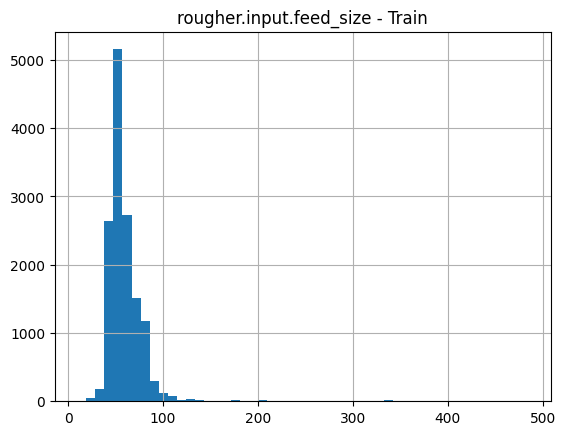

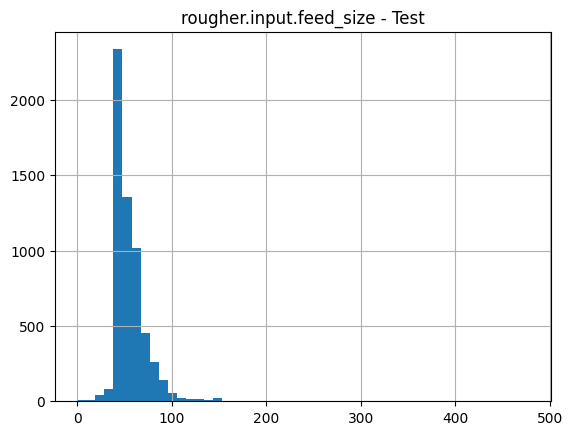

In [9]:
size_col = None
for c in ["rougher.input.feed_size", "primary_cleaner.input.feed_size"]:
    if c in train_clean.columns and c in test_filled.columns:
        size_col = c; break

if size_col:
    display(pd.DataFrame({
        "train": train_clean[size_col].describe(),
        "test":  test_filled[size_col].describe()
    }))
    train_clean[size_col].hist(bins=50); plt.title(f"{size_col} - Train"); plt.show()
    test_filled[size_col].hist(bins=50);  plt.title(f"{size_col} - Test");  plt.show()

In [10]:
def total_conc(df, prefix):
    cols = [f"{prefix}_{m}" for m in ["au","ag","pb","sol"] if f"{prefix}_{m}" in df.columns]
    return df[cols].sum(axis=1) if cols else pd.Series(index=df.index, dtype=float)

eps = 1e-3
bad_idx = set()

for pref in ["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]:
    s = total_conc(train_clean, pref)
    if not s.empty:
        bad_idx |= set(s[s < eps].index)

print("Anomalías (suma≈0) en train:", len(bad_idx))
train_an = train_clean.drop(index=list(bad_idx), errors="ignore").copy()
bad_idx_test = set()
for pref in ["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]:
    s = total_conc(test_filled, pref)
    if not s.empty:
        bad_idx_test |= set(s[s < eps].index)
print("Anomalías (suma≈0) en test:", len(bad_idx_test))
test_an = test_filled.drop(index=list(bad_idx_test), errors="ignore").copy()

train_an.shape, test_an.shape

Anomalías (suma≈0) en train: 354
Anomalías (suma≈0) en test: 371


((13795, 86), (5485, 52))

In [11]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    out = np.zeros_like(denom, dtype=float)
    nz = denom != 0
    out[nz] = np.abs(y_true[nz] - y_pred[nz]) / denom[nz]
    return out.mean() * 100

def smape_final(y_true_rough, y_pred_rough, y_true_final, y_pred_final):
    return 0.25*smape(y_true_rough, y_pred_rough) + 0.75*smape(y_true_final, y_pred_final)

smape_scorer = make_scorer(smape, greater_is_better=False)

In [12]:
X = train_an[FEATURES]
y_rough = train_an["rougher.output.recovery"]
y_final = train_an["final.output.recovery"]

pipe_lr = Pipeline([("scaler", StandardScaler(with_mean=False)),
                    ("lr", LinearRegression())])

pipe_rf = Pipeline([("rf", RandomForestRegressor(
    n_estimators=300, max_depth=8, random_state=12345, n_jobs=-1
))])

cv = KFold(n_splits=5, shuffle=True, random_state=12345)

def eval_model(pipe):
    r = -cross_val_score(pipe, X, y_rough, cv=cv, scoring=smape_scorer, n_jobs=-1).mean()
    f = -cross_val_score(pipe, X, y_final, cv=cv, scoring=smape_scorer, n_jobs=-1).mean()
    return r, f, 0.25*r + 0.75*f

scores = {}
for name, pipe in [("LinearRegression", pipe_lr), ("RandomForest", pipe_rf)]:
    r, f, w = eval_model(pipe)
    scores[name] = {"sMAPE_rough_CV": r, "sMAPE_final_CV": f, "sMAPE_final_weighted_CV": w}

pd.DataFrame(scores).T.sort_values("sMAPE_final_weighted_CV")

,sMAPE_rough_CV,sMAPE_final_CV,sMAPE_final_weighted_CV
RandomForest,3.407131,6.823884,5.969695
LinearRegression,4.666144,8.159631,7.286259


In [14]:
best = pipe_rf
model_rough = best
model_final = best

model_rough.fit(X, y_rough)
model_final.fit(X, y_final)
X_test = test_an[FEATURES]
pred_rough = model_rough.predict(X_test)
pred_final = model_final.predict(X_test)
y_true_test = full.loc[X_test.index, ["rougher.output.recovery","final.output.recovery"]].dropna()
idx = y_true_test.index

s_r = smape(y_true_test.loc[idx, "rougher.output.recovery"], pd.Series(pred_rough, index=X_test.index).loc[idx])
s_f = smape(y_true_test.loc[idx, "final.output.recovery"],   pd.Series(pred_final, index=X_test.index).loc[idx])
s_w = 0.25*s_r + 0.75*s_f

print("===== RESULTADOS EN TEST =====")
print(f"sMAPE(rougher): {s_r:.3f}")
print(f"sMAPE(final) : {s_f:.3f}")
print(f"sMAPE FINAL (25/75): {s_w:.3f}")

===== RESULTADOS EN TEST =====
sMAPE(rougher): 28.064
sMAPE(final) : 9.574
sMAPE FINAL (25/75): 14.197


El modelo ofrece predicciones confiables en la recuperación final —la más relevante para la producción y rentabilidad— aunque muestra debilidades en la predicción de la etapa rougher. En términos prácticos, puede considerarse un buen modelo para apoyar la toma de decisiones, pero convendría seguir afinando los parámetros o probar algoritmos más robustos para mejorar la exactitud en las primeras etapas del proceso.

<div class="alert alert-block alert-danger">
  <b>Comentario Final del Revisor</b> <a class="tocSkip"></a><br>
  Tu proyecto está muy bien estructurado y en general cumple con los objetivos planteados 👏. El flujo de trabajo, las pruebas con distintos modelos y la validación de resultados son correctos y muestran un buen dominio técnico.<br><br>

  Sin embargo, encontramos un problema crítico en la <b>imputación de valores faltantes</b>: al aplicar <code>ffill().bfill()</code> sobre todo el conjunto de entrenamiento, se están utilizando <b>valores del futuro</b>. Esto constituye un caso claro de <b>data leakage</b>, ya que el modelo tiene acceso a información que en un escenario real no existiría al momento de predecir.<br><br>

  Por esta razón, <b>no podemos aprobar el proyecto en esta entrega</b>. Para corregirlo te sugerimos:<br>
  • Usar <b>imputación con mediana</b> por columna, que es robusta y segura.<br>
  • O bien, aplicar únicamente <b>forward fill (ffill)</b>, de manera que se respeten los datos cronológicos.<br>

</div>



# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

🎉 ¡Felicitaciones! Tu proyecto ha sido **aprobado** en esta segunda iteración. Has hecho un gran trabajo aplicando las correcciones indicadas y tu notebook ha mejorado significativamente tanto en la parte técnica como en su organización general.

#### Aspectos Positivos:

* **Correcciones aplicadas con éxito:** Se resolvió correctamente el problema de imputación con forward fill y mediana, lo que elimina riesgos de *data leakage* y mejora la validez del modelo.
* **Consistencia en el preprocesamiento:** La limpieza de anomalías, creación de funciones auxiliares y validación de dimensiones están bien estructuradas.
* **Evaluación robusta de modelos:** Usaste `KFold` junto a métricas personalizadas (`sMAPE`) y ponderación adecuada para simular condiciones reales de negocio.
* **Automatización y reutilización:** Buen uso de funciones para encapsular lógica clave (`eval_model`, `total_conc`, etc.), lo que muestra orden y visión a largo plazo del código.

#### Áreas de Mejora:

* Algunos `import` aún aparecen más de una vez en el notebook. Aunque no afectan el resultado, mantenerlos todos al inicio ayuda a que el notebook sea más limpio y profesional.
* Podrías considerar agrupar ciertos bloques repetidos (como lectura de CSVs) en funciones para mejorar la modularidad.
* Las visualizaciones son escasas; una gráfica que muestre la importancia de variables o distribución de errores podría enriquecer la interpretación final del modelo.

#### Temas adicionales para investigar:

* **Técnicas avanzadas de imputación:** Uso de modelos como KNNImputer o IterativeImputer para conjuntos con estructuras más complejas.
* **Feature Importance y Explainability:** Integración de herramientas como SHAP o Permutation Importance para interpretar el modelo.
* **Optimización con GridSearch o RandomizedSearchCV:** Para ajustar hiperparámetros del Random Forest o probar otros algoritmos como Gradient Boosting.


</div>
